In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=2bf3c643072dfe861dbb675a2c0deb1bc2a6de3131fc1b185b0f29af23a73932
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
spark=SparkSession.builder.appName('Students').getOrCreate()

In [3]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
df=spark.read.csv('drive/My Drive/Colab Notebooks/students.csv',header=True,inferSchema=True)

In [6]:
df.show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group C|               some college|    standard|              completed|        69|           90|           88|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group A|         associate's degree|free/reduced|                   none|        47|           57|           44|
|  male|       group C|               some college|    standard|                   none|        76|     

In [7]:
#Number of male and female students
df.select(col('gender')).groupby(col('gender')).count().show()

+------+-----+
|gender|count|
+------+-----+
|female|  518|
|  male|  482|
+------+-----+



In [8]:
#List different race/ethnicity
df.select(col('race/ethnicity')).distinct().show()

+--------------+
|race/ethnicity|
+--------------+
|       group B|
|       group C|
|       group D|
|       group A|
|       group E|
+--------------+



In [9]:
#What are different level of parental education
df.select(col("parental level of education")).distinct().show()

+---------------------------+
|parental level of education|
+---------------------------+
|           some high school|
|         associate's degree|
|                high school|
|          bachelor's degree|
|            master's degree|
|               some college|
+---------------------------+



In [11]:
#How many female students scored more than 79 marks in math, whose parental level of education is 'high school'?
df.filter(col("gender")=="female").filter(col("math score")>79).filter(col("parental level of education")=="high school").count()

5

In [19]:
#Check whether average maths score of male or female students are high?
max_df=df.select(col("gender"),col("math score")).groupby(col("gender")).mean()
max_avg=max_df.agg({"avg(math score)":"max"}).collect()[0][0]
max_df.select(col("gender")).where(col("avg(math score)")==max_avg).show()

+------+
|gender|
+------+
|  male|
+------+



In [20]:
# What is average reading score of male and female students?
df.select(col("gender"),col("reading score")).groupby(col("gender")).mean().show()

+------+------------------+
|gender|avg(reading score)|
+------+------------------+
|female| 72.60810810810811|
|  male| 65.47302904564316|
+------+------------------+



In [21]:
#Whether students score depends upon 'parental level of education'? Justify your answer.
import pandas as pd
df_pd=df.select(col("parental level of education"),col("math score")).groupby(col("parental level of education")).mean()
score=df_pd.toPandas()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'some high school'),
  Text(1, 0, "associate's degree"),
  Text(2, 0, 'high school'),
  Text(3, 0, "bachelor's degree"),
  Text(4, 0, "master's degree"),
  Text(5, 0, 'some college')])

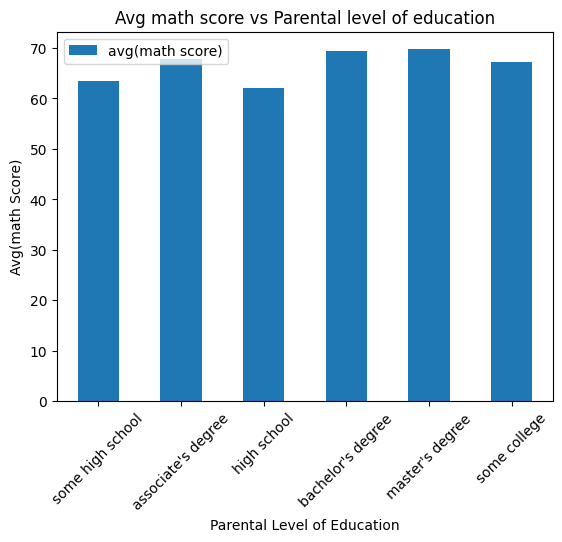

In [31]:
import matplotlib.pyplot as plt
score.plot(x="parental level of education",kind="bar")
plt.xlabel("Parental Level of Education")
plt.ylabel("Avg(math Score)")
plt.title("Avg math score vs Parental level of education")
plt.xticks(rotation=45)


In [34]:
#List the records where 'test preparation course' is 'none' and scored more than 70 in maths
df.filter(col("test preparation course")=="none").filter(col("math score")>70).show()

+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|gender|race/ethnicity|parental level of education|       lunch|test preparation course|math score|reading score|writing score|
+------+--------------+---------------------------+------------+-----------------------+----------+-------------+-------------+
|female|       group B|          bachelor's degree|    standard|                   none|        72|           72|           74|
|female|       group B|            master's degree|    standard|                   none|        90|           95|           93|
|  male|       group C|               some college|    standard|                   none|        76|           78|           75|
|female|       group B|         associate's degree|    standard|                   none|        71|           83|           78|
|  male|       group C|                high school|    standard|                   none|        88|     